In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scale = 0.7
gamma = 0.5
def a(n, iters=1000):
    q1 = sps.chi2.ppf((1 + gamma) / 2, n)
    q2 = sps.chi2.ppf((1 - gamma) / 2, n)
    X = sps.norm.rvs(scale=scale, size=n * iters).reshape(iters, n)
    r = (X ** 2).sum(axis=1)
    return (r / q2 - r / q1).mean()

def b(n, iters=1000):
    q1 = sps.norm.ppf((3 + gamma) / 4)
    q2 = sps.norm.ppf((3 - gamma) / 4)
    X = sps.norm.rvs(scale=scale, size=n * iters).reshape(iters, n)
    r = X.mean(axis=1) ** 2
    return (n * r / (q2 ** 2) - n * r / (q1 ** 2)).mean()

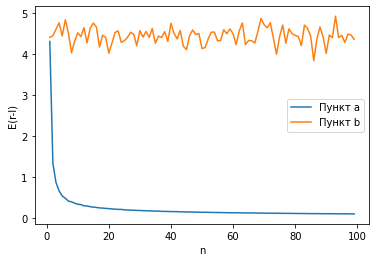

In [3]:
x = range(1, 100, 1)
y_a = [a(i) for i in x]
y_b = [b(i) for i in x]
plt.plot(x, y_a, label="Пункт a")
plt.plot(x, y_b, label="Пункт b")
plt.legend()
plt.xlabel("n")
plt.ylabel("E(r-l)")
plt.show()

Интервал в первой оценке сокращается при увеличении n, а во второй остаётся примерно неизменным